<h2> <center> Machine Learning  <center> </h2>


      
<h3>  <center>Conceitos básicos : 
    
   
    
     Normalização dos dados 
     
     Treinamento supervisionado e não-supervisionado

     Regressão não-linear  

<h2> <center>O que é ? Aonde é aplicado ? </h2>

<h3>Machine learning is a subset of AI that uses computer algorithms to analyze data and make intelligent decisions based on what it is learned without being explicitly programmed. Machine learning algorithms are trained with large sets of data and they learn from examples. They do not follow rules-based algorithms. Machine learning is what enables machines to solve problems on their own and make accurate predictions using the provided data.</h3>

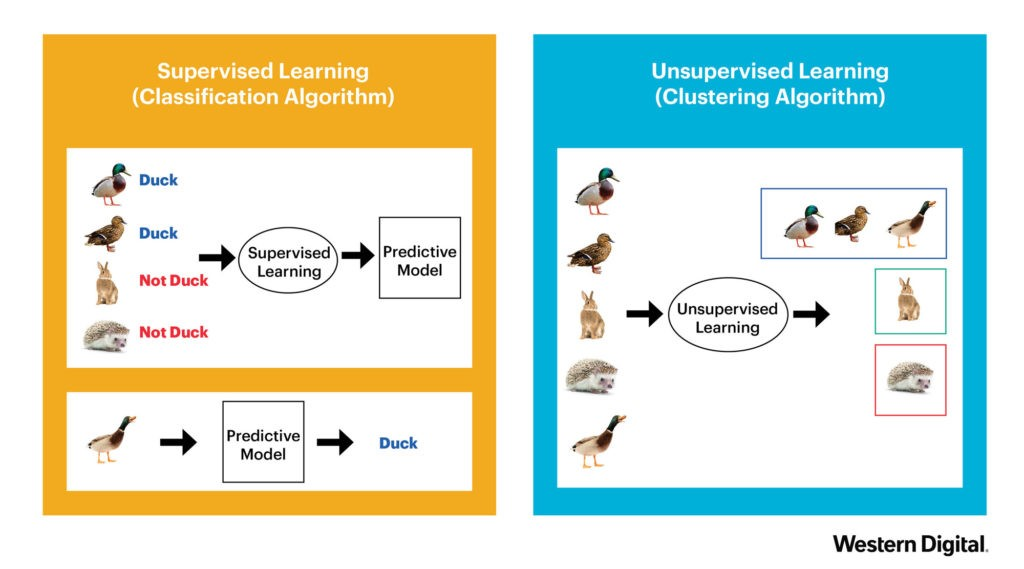

<h2><center> Machine Learning </h2>

In [71]:
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [72]:
x=np.arange(-10,11,0.1)

In [73]:
y = 1*(x**2) + 1*x + 3

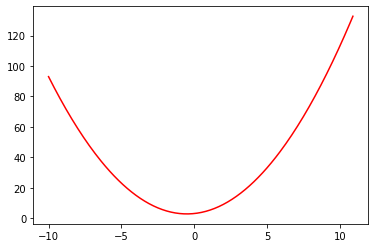

In [74]:
plt.plot(x,y,'r')

In [75]:
y_noise = 5 * np.random.normal(size=x.size)

In [76]:
ydata = y + y_noise 

Text(0.5, 0, 'Independent Variable')

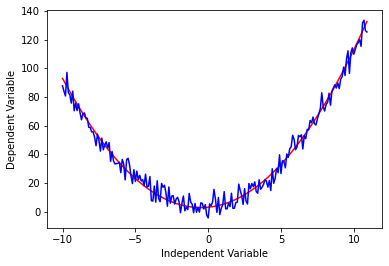

In [77]:
plt.plot(x,y,'r')
plt.plot(x,ydata,'b')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
#plt.show()

In [78]:
pearson_coef, p_value = stats.pearsonr(x, y)
print("The Pearson Correlation Coefficient (x,y) without noise is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient (x,y) without noise is 0.3307108027122676  with a P-value of P = 9.462588289129882e-07


In [79]:
pearson_coef, p_value = stats.pearsonr(x, ydata)
print("The Pearson Correlation Coefficient (x,ydata) with noise is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient (x,ydata) with noise is 0.333912819526918  with a P-value of P = 7.31271096734769e-07


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, ydata, test_size=0.30, random_state=0)

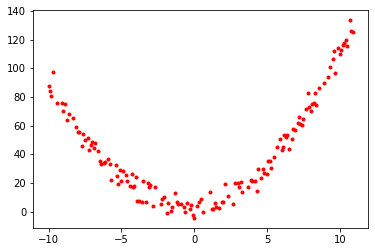

In [81]:
plt.plot(X_train,y_train,'.r')


<h2><center> Regressão Linear - Usando a Transformação de X -- XT = (X,X^2, X^3,..,Xˆn)<h2>

In [82]:
poly = PolynomialFeatures(degree=2)
X_T = poly.fit_transform(X_train.reshape(-1,1))
X_T

array([[ 1.00000000e+00, -3.90000000e+00,  1.52100000e+01],
       [ 1.00000000e+00, -7.60000000e+00,  5.77600000e+01],
       [ 1.00000000e+00, -7.00000000e+00,  4.90000000e+01],
       [ 1.00000000e+00, -4.00000000e+00,  1.60000000e+01],
       [ 1.00000000e+00, -4.40000000e+00,  1.93600000e+01],
       [ 1.00000000e+00,  5.30000000e+00,  2.80900000e+01],
       [ 1.00000000e+00, -1.10000000e+00,  1.21000000e+00],
       [ 1.00000000e+00, -8.10000000e+00,  6.56100000e+01],
       [ 1.00000000e+00,  5.70000000e+00,  3.24900000e+01],
       [ 1.00000000e+00,  3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -4.60000000e+00,  2.11600000e+01],
       [ 1.00000000e+00,  6.80000000e+00,  4.62400000e+01],
       [ 1.00000000e+00, -4.90000000e+00,  2.40100000e+01],
       [ 1.00000000e+00,  8.20000000e+00,  6.72400000e+01],
       [ 1.00000000e+00,  4.30000000e+00,  1.84900000e+01],
       [ 1.00000000e+00,  6.00000000e-01,  3.60000000e-01],
       [ 1.00000000e+00,  3.90000000e+00

In [83]:
#lr.fit(x.reshape(-1,1),y)
lr = LinearRegression()
lr.fit(X_T,y_train)

LinearRegression()

In [84]:
y_T = lr.predict(X_T)
y_T[0:5]

array([14.75008713, 52.48854936, 44.55822273, 15.41961151, 18.29239459])

In [85]:
lr.score(X_T,y_train)

0.981325626417991

<h2><center> Regressão Não-Linear - Função Qunadrática <h2>

In [86]:
def quadratic(x,a,b,c):
     y = a*(x**2) + b*x + c 
     return y

In [87]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(quadratic, X_train, y_train)
#print the final parameters
print(" a = %f, b = %f, c = %f" % (popt[0], popt[1],popt[2]))

 a = 0.973428, b = 0.994837, c = 3.824113


In [88]:
# build the model using train set
#popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = quadratic(X_test, *popt)
y_hat

array([ 70.451807  ,   5.72815019,  40.85588493,  82.22503315,
        87.96094011,   4.94609629,   7.90782752,  10.72414553,
         3.80270343,  37.58139218,  27.79870418,  39.92190111,
        21.47667458,  91.62531106,   3.58192621,   4.33925942,
        99.18767566,  36.1919944 ,  11.69449359,  61.11974411,
        58.48594222,  65.69816704,  78.76391146,  19.05926172,
         3.65123678,  18.45938593,  12.39513008,  11.81866667,
        42.34028427,  82.61039788,   7.42094454,  32.07081965,
        21.66079329,   9.12561408,  86.15795747,  28.01279569,
        67.61007339,   8.76872595,  64.1525575 ,  19.23053493,
        93.48669937,  55.28774003,   4.37779589,  24.26626868,
        83.98479684,   7.81790908,  20.02115249,  28.7797255 ,
        13.46944401,   5.24297616,  49.76723289,   3.93333057,
        52.79255929, 107.06153721,  77.06255345,  32.89849637,
         5.50794262,  12.99106205,  14.89566931,   5.79237764,
       123.74375116,   4.99747825,   7.04344855])

In [89]:
print("Residual sum of squares (MSE): %f" % np.mean((y_hat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: " , r2_score(y_test,y_hat) )

Residual sum of squares (MSE): 23.698840
R2-score:  0.9781987711414046


In [90]:
y_test

array([ 69.08597431,   6.88212766,  35.0158709 ,  81.55962849,
        86.25341966,  10.82192948,  12.79317961,  14.78710403,
        -0.84958037,  40.1763833 ,  37.22944588,  43.81895276,
        22.28137489,  85.87969546,   5.64295408,   1.38423224,
        94.97908784,  33.49575168,   9.0919051 ,  58.86838953,
        63.55089454,  68.89165935,  84.07745178,  22.28286584,
        -0.5316633 ,  12.78878579,  15.97181488,   5.03282241,
        53.25617975,  84.06630997,  10.76228198,  39.62507298,
        18.96233748,  13.04022329,  88.55090518,  19.73971172,
        68.27489793,   2.30265674,  65.49258611,  22.15797259,
        92.44340058,  51.97426859,  15.47572387,  17.03524353,
        83.01173909,   5.81998315,  15.54295168,  36.20126097,
        17.83698354,  -2.13953705,  42.20900827,   5.30695851,
        53.03836938, 110.97129365,  70.37051076,  27.1742508 ,
         2.40207698,   7.35892326,  15.89471306,   4.65879197,
       131.72165782,   9.77508144,  11.09625984])

<h2> A transformação funciona para f(x)  Polinomiais - E para outras funções não-lineareas ??? </h2>

In [91]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [92]:
x=np.arange(-10,10,0.1)
Y = sigmoid(x,1,1)

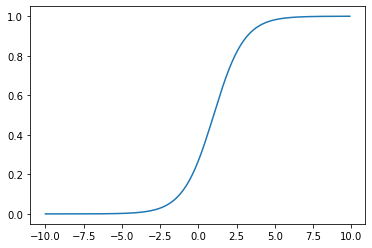

In [93]:
plt.plot(x,Y)

<h3> Por que às vezes (ou quase sempre) preciso normalizar os dados de entrada de uma ML ? </h3>

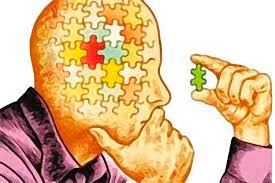

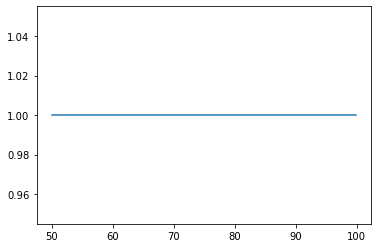

In [157]:
x=np.arange(50,100,0.1)
Y = sigmoid(x,1,1)
plt.plot(x,Y)

<h3>  <center>O que está ERRADO ???? 

      Dados de entrada precisam ser normalizados !!!! 
</h3>


In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x.reshape(-1,1)))
xT = scaler.transform(x.reshape(-1,1))
#xT = x/np.max(x)

StandardScaler()


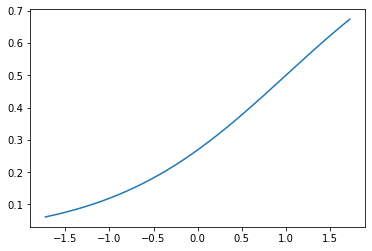

In [96]:
Y = sigmoid(xT,1,1)
plt.plot(xT,Y)

<h3>  <center> Vetor de entrada composto por N Features 
          
      com ranges diferentes também será necessário a 
    
            Normalização !!!!
 </h3> 

In [149]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv')
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [150]:
scaler.fit(df[['Humidity','Visibility (km)','Pressure (millibars)']])

StandardScaler()

In [151]:
df[['Humidity','Visibility (km)','Pressure (millibars)']] = scaler.transform(df[['Humidity','Visibility (km)','Pressure (millibars)']])


In [153]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.793470,14.1197,251.0,1.306976,0.0,0.101685,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.639996,14.2646,259.0,1.306976,0.0,0.105960,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.793470,3.9284,204.0,1.099586,0.0,0.108610,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.486521,14.1036,269.0,1.306976,0.0,0.112628,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.486521,11.0446,259.0,1.306976,0.0,0.113483,Partly cloudy throughout the day.


<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

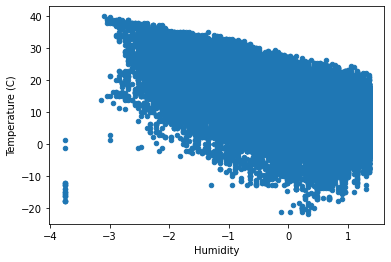

In [154]:
df.plot(kind='scatter', x='Humidity', y='Temperature (C)')

In [156]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


<h2><center> K-NN (K Nearest Neighbor) </h2>

<h3> <center>
    
    
    
•	 Amongst the simplest of all machine learning
algorithms. No eXplicit training or model.
    
•	 Can be used both for classifcaton and
regression.
    
•	 Use XIs K-Nearest Neighbors to vote on what
XIs label should be. </h3>

<h2><center> Classification Problem </h2>

<h3><center>Classify using the majority vote of the k closest training points</h3>


Screen Shot 2021-03-10 at 8.23.12 PM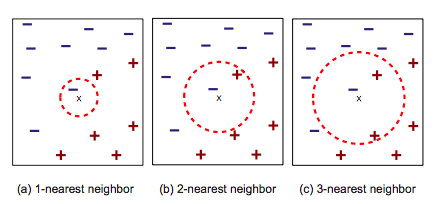

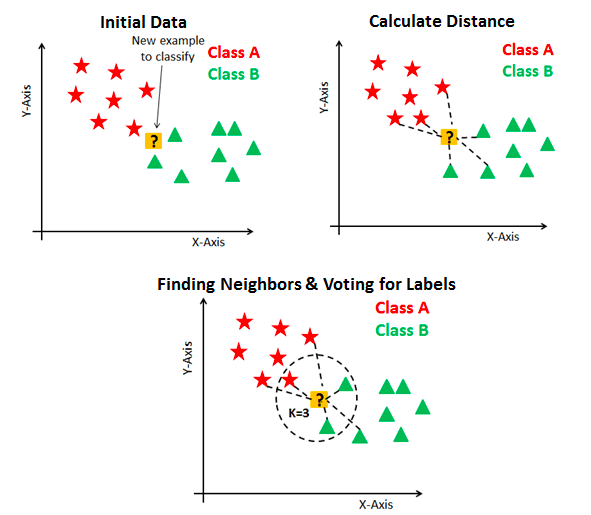

<h3>For regression: the value for the test example
becomes the (weighted) average of the values
of the K neighbors. </h3>

<h3> 
    
The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.</h3>

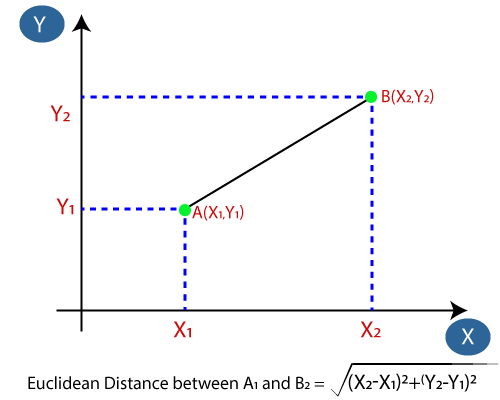

In [130]:
df2 = pd.read_csv('dataClean.csv')

In [131]:
from sklearn import neighbors

In [132]:
n_neighbors = 10
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
X = df2[['Duration']]
y = df2[['Calories']]

In [137]:
T = np.array(60)
y_ = knn.fit(X, y).predict(X)

In [138]:
y_

array([[ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 280.90870968],
       [ 280.90870968],
       [ 310.60704225],
       [ 310.60704225],
       [ 280.90870968],
       [ 184.18      ],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 280.90870968],
       [ 310.60704225],
       [ 280.90870968],
       [ 310.60704225],
       [ 280.90870968],
       [ 310.60704225],
       [ 280.90870968],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 280.90870968],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 280.90870968],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.60704225],
       [ 310.607

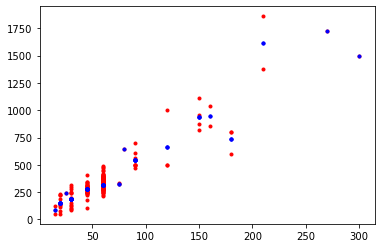

In [140]:
plt.plot(X,y,'.r')
plt.plot(X,y_,'.b')

In [155]:
print("R2-score: " , r2_score(y,y_) )

R2-score:  0.916801125401288
